In [1]:
import hypernetx as hnx
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import random
import time
import hypernetx.algorithms.contagion as contagion

## Create a hypergraph

In [4]:
n = 1000
m = 10000

hyperedgeList = [random.sample(range(n), k=random.choice([2,3])) for i in range(m)]
H = hnx.Hypergraph(hyperedgeList, static=False)

## Initialize simulation variables
- $\tau$ is a dictionary of the infection rate for each hyperedge size
- $\gamma$ is the healing rate
- $t_{max}$ is the time at which to terminate the simulation if it hasn't already
- $\Delta t$ is the time step size to use for the discrete time algorithm

In [9]:
tau = {2:0.01, 3:0.01}
gamma = 0.01
tmax = 100
dt = 0.1

## Run the SIR epidemic simulations
- The discrete SIR takes fixed steps in time and multiple infection/healing events can happen at each time step.
- The Gillespie SIR algorithm takes steps in time exponentially distributed and at each step forward, a single event occurs
- As $\Delta t\to 0$, the discrete time algorithm converges to the Gillespie algorithm. 

In [5]:
start = time.time()
t1, S1, I1, R1 = contagion.discrete_SIR(H, tau, gamma, rho=0.1, tmin=0, tmax=tmax, dt=dt)
print(time.time() - start)

start = time.time()
t2, S2, I2, R2 = contagion.Gillespie_SIR(H, tau, gamma, rho=0.1, tmin=0, tmax=tmax)
print(time.time() - start)

11.98878288269043
0.1570911407470703


## Plot of the results
- Dashed lines are the results from the discrete time algorithm
- Solid lines are the results from the Gillespie algorithm
- Plots of the numbers susceptible, infected, and recovered over time

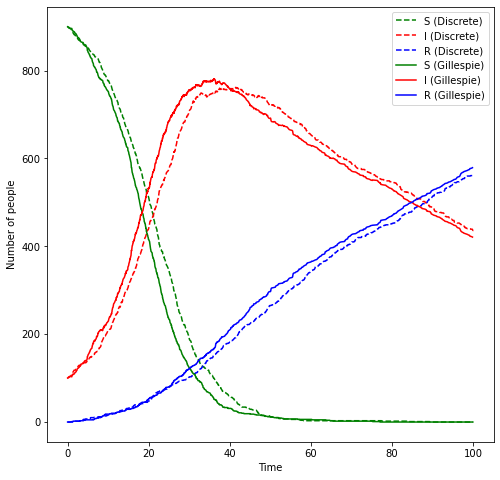

In [11]:
plt.figure()
plt.plot(t1, S1, 'g--', label='S (Discrete)')
plt.plot(t1, I1, 'r--', label='I (Discrete)')
plt.plot(t1, R1, 'b--', label='R (Discrete)')
plt.plot(t2, S2, 'g-', label='S (Gillespie)')
plt.plot(t2, I2, 'r-', label='I (Gillespie)')
plt.plot(t2, R2, 'b-', label='R (Gillespie)')
plt.xlabel("Time")
plt.ylabel("Number of people")
plt.legend()
plt.show()

In [ ]:
## SIS Model

In this model, once individuals heal, they may become re-infected.

## Epidemic parameters

In [13]:
tau = {2:0.01, 3:0.01}
gamma = 0.01
tmax = 100
dt = 1

In [18]:
tau = {2:0.01, 3:0.01}
gamma = 0.01
start = time.time()
t1, S1, I1 = contagion.discrete_SIS(H, tau, gamma, rho = 0.1, tmin = 0, tmax=tmax, dt=dt)
print(time.time() - start)

start = time.time()
t2, S2, I2 = contagion.Gillespie_SIS(H, tau, gamma, rho = 0.1, tmin = 0, tmax=tmax)
print(time.time() - start)

1.3823719024658203
0.2796139717102051


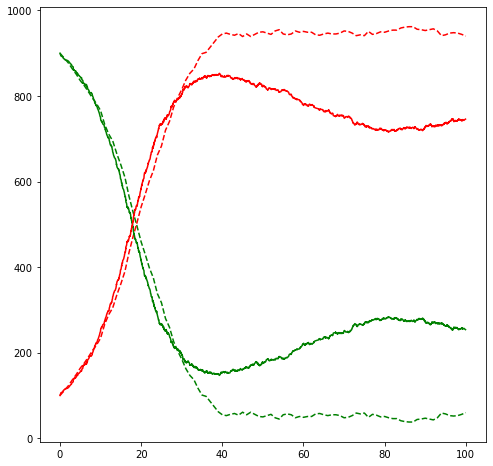

In [19]:
plt.figure()
plt.plot(t1, S1, 'g--')
plt.plot(t1, I1, 'r--')
plt.plot(t2, S2, 'g-')
plt.plot(t2, I2, 'r-')

plt.show()